In [24]:
using GaussianProcesses
using Random
using Plots 
using LinearAlgebra

Random.seed!(2022)
# Training data
n = 10;                          #number of training points
x = rand(Float64, n);              #predictors
y = sin.(x) + 0.05*randn(n);   #regressors

In [25]:
s = sqrt(1)
l = 0.5
mZero = MeanZero()                   #Zero mean function
kern = SE(log(l),log(s))                   #Sqaured exponential kernel (note that hyperparameters are on the log scale)

gp = GP(x,y,mZero,kern)

GP Exact object:
  Dim = 1
  Number of observations = 10
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SEIso{Float64}, Params: [-0.6931471805599453, 0.0]
  Input observations = 
[0.2192446660977143 0.667603087363648 … 0.5260867498730181 0.2654657001673143]
  Output observations = [0.20901132017204066, 0.6748538140929543, 0.19081679757884876, 0.40808289341467724, 0.907758331935309, 0.17147980990228817, 0.6640609470968418, 0.17077402054989219, 0.4408585055679146, 0.2830338313303546]
  Variance of observation noise = 0.01831563888873418
  Marginal Log-Likelihood = 3.254

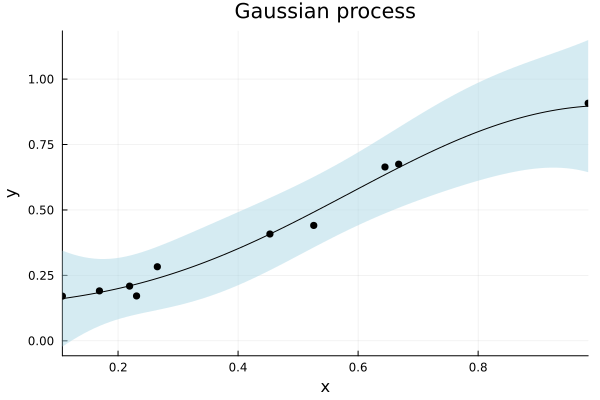

In [3]:
plot(gp; xlabel="x", ylabel="y", title="Gaussian process", legend=false, fmt=:png)      # Plot the GP

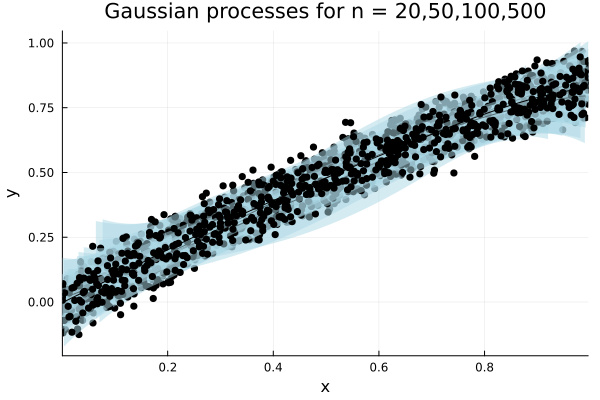

In [9]:
for n in [20,50,100,500]
    x = rand(Float64, n);             
    y = sin.(x) + 0.05*randn(n);
    gp = GP(x,y,mZero,kern)
    plot!(gp; xlabel="x", ylabel="y", title="Gaussian process", legend=false, fmt=:png)      # Plot the GP
end

title!("Gaussian processes for n = 20,50,100,500")

In [29]:
n = 10
x = rand(Float64, n);
m = zeros(n)
Σ = s^2*exp(-x*transpose(x) /l^2)
Ct = factorize(Σ)

z = m + dot(Ct,x)

LoadError: DimensionMismatch("x and y are of different lengths!")

In [30]:
x

10-element Vector{Float64}:
 0.44545277649644044
 0.47185365022337866
 0.9697671385434297
 0.4167208789787079
 0.286453849983089
 0.07735711243271359
 0.17348936994685293
 0.5367992216076015
 0.9204363261615444
 0.3533227531283043

In [31]:
Σ

10×10 Matrix{Float64}:
  0.931894   -0.0721421  -0.148268   …  -0.0820717  -0.140726   -0.0540198
 -0.0721421   0.923582   -0.157056      -0.0869358  -0.149067   -0.0572214
 -0.148268   -0.157056    0.677214      -0.178673   -0.306366   -0.117603
 -0.0637128  -0.0674889  -0.138705      -0.076778   -0.131649   -0.0505355
 -0.0437962  -0.0463918  -0.0953458     -0.0527772  -0.0904957  -0.0347381
 -0.0118272  -0.0125282  -0.0257482  …  -0.0142525  -0.0244384  -0.00938105
 -0.0265249  -0.028097   -0.0577457     -0.0319642  -0.0548083  -0.021039
 -0.0820717  -0.0869358  -0.178673       0.901098   -0.169584   -0.0650973
 -0.140726   -0.149067   -0.306366      -0.169584    0.709218   -0.111621
 -0.0540198  -0.0572214  -0.117603      -0.0650973  -0.111621    0.957153

In [35]:
Ct * x

LoadError: MethodError: no method matching *(::Cholesky{Float64, Matrix{Float64}}, ::Vector{Float64})
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at C:\Users\guilh\AppData\Local\Programs\Julia-1.7.3\share\julia\base\operators.jl:655
[0m  *([91m::StridedMatrix{T}[39m, ::StridedVector{S}) where {T<:Union{Float32, Float64, ComplexF32, ComplexF64}, S<:Real} at C:\Users\guilh\AppData\Local\Programs\Julia-1.7.3\share\julia\stdlib\v1.7\LinearAlgebra\src\matmul.jl:44
[0m  *([91m::Union{SparseArrays.AbstractSparseMatrixCSC{TA, Ti}, SubArray{TA, 2, <:SparseArrays.AbstractSparseMatrixCSC{TA, Ti}, Tuple{Base.Slice{Base.OneTo{Int64}}, I}} where I<:AbstractUnitRange} where Ti[39m, ::Union{StridedVector, BitVector}) where TA at C:\Users\guilh\AppData\Local\Programs\Julia-1.7.3\share\julia\stdlib\v1.7\SparseArrays\src\linalg.jl:50
[0m  ...

In [40]:
Ct\A

LoadError: UndefVarError: A not defined